# p87 Multilingual Named Entity Recognition

In [1]:
RUN_AGAIN = False
KAGGLE = False
TRAIN_MODEL_1 = False
SKIP_ERROR_ANALYSIS_1 = False

In [2]:
if KAGGLE:
    import subprocess
    print(subprocess.check_output(['pip', 'install', 'seqeval']))
    print(subprocess.check_output(['apt-get', 'install', 'git-lfs']))
    print(subprocess.check_output(['git', 'lfs', 'install']))
    
    from huggingface_hub import notebook_login
    notebook_login()

# p88 The Dataset

In [3]:
from datasets import get_dataset_config_names

xtreme_subsets = get_dataset_config_names('xtreme')
print(f'XTREME has {len(xtreme_subsets)} configurations')

XTREME has 183 configurations


In [4]:
panx_subsets = [s for s in xtreme_subsets if s.startswith('PAN')]
len(panx_subsets), panx_subsets[:3]

(40, ['PAN-X.af', 'PAN-X.ar', 'PAN-X.bg'])

In [5]:
from datasets import load_dataset

load_dataset('xtreme', name='PAN-X.de')

Reusing dataset xtreme (/home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 20000
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
})

In [6]:
from collections import defaultdict
from datasets import DatasetDict

langs = ['de', 'fr', 'it', 'en']
fracs = [0.629, 0.229, 0.084, 0.059]  # language proportions for Swiss

panx_ch = defaultdict(DatasetDict)

for lang, frac in zip(langs, fracs):
    ds = load_dataset('xtreme', name=f'PAN-X.{lang}')
    for split in ds:
        panx_ch[lang][split] = (
            ds[split]
            .shuffle(seed=0)
            .select(range(int(frac * ds[split].num_rows)))
        )

Reusing dataset xtreme (/home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-ad1b311e95818edf.arrow
Loading cached shuffled indices for dataset at /home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-9e4b5e384626785e.arrow
Loading cached shuffled indices for dataset at /home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-b80ca41f318cd7e7.arrow
Reusing dataset xtreme (/home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.fr/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.fr/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-222f2a739e50779b.arrow
Loading cached shuffled indices for dataset at /home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.fr/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-ae79577dfb0e7498.arrow
Loading cached shuffled indices for dataset at /home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.fr/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-0bc206f54324de18.arrow
Reusing dataset xtreme (/home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.it/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.it/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-2a286f85a785394c.arrow
Loading cached shuffled indices for dataset at /home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.it/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-55894a1d8ab171ae.arrow
Loading cached shuffled indices for dataset at /home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.it/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-b2a9c20bbec1f943.arrow
Reusing dataset xtreme (/home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.en/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.en/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-b91db9df81081a1f.arrow
Loading cached shuffled indices for dataset at /home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.en/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-dea8d95ed2e6a82a.arrow
Loading cached shuffled indices for dataset at /home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.en/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-56dba7892a30e39c.arrow


In [7]:
import pandas as pd

pd.DataFrame({lang: [panx_ch[lang]['train'].num_rows] for lang in langs}, index=['Number of training examples'])

,de,fr,it,en
Number of training examples,12580,4580,1680,1180


In [8]:
element = panx_ch['de']['train'][0]
for key, value in element.items():
    print(f'{key}: {value}')

tokens: ['2.000', 'Einwohnern', 'an', 'der', 'Danziger', 'Bucht', 'in', 'der', 'polnischen', 'Woiwodschaft', 'Pommern', '.']
ner_tags: [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]
langs: ['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de']


In [9]:
for key, value in panx_ch['de']['train'].features.items():
    print(f'{key}: {value}')

tokens: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
ner_tags: Sequence(feature=ClassLabel(num_classes=7, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None)
langs: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)


In [10]:
tags = panx_ch['de']['train'].features['ner_tags'].feature
print(tags)

ClassLabel(num_classes=7, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None)


In [11]:
def create_tag_names(batch):
    return {'ner_tags_str': [tags.int2str(idx) for idx in batch['ner_tags']]}

panx_de = panx_ch['de'].map(create_tag_names)

Loading cached processed dataset at /home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-5b62d9b8a4e5580f.arrow
Loading cached processed dataset at /home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-8403dced22f6a010.arrow
Loading cached processed dataset at /home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-0f448a275fd96bd5.arrow


In [12]:
de_example = panx_de['train'][0]
pd.DataFrame([de_example['tokens'], de_example['ner_tags_str']], ['Tokens', 'Tags'])

,0,1,2,3,4,5,6,7,8,9,10,11
Tokens,2.000,Einwohnern,an,der,Danziger,Bucht,in,der,polnischen,Woiwodschaft,Pommern,.
Tags,O,O,O,O,B-LOC,I-LOC,O,O,B-LOC,B-LOC,I-LOC,O


In [13]:
from collections import Counter

split2freqs = defaultdict(Counter)
for split, dataset in panx_de.items():
    for row in dataset['ner_tags_str']:
        for tag in row:
            if tag.startswith('B'):
                tag_type = tag.split('-')[1]
                split2freqs[split][tag_type] += 1
pd.DataFrame.from_dict(split2freqs, orient='index')

,LOC,ORG,PER
train,6186,5366,5810
validation,3172,2683,2893
test,3180,2573,3071


# p93 A Closer Look at Tokenization

In [14]:
from transformers import AutoTokenizer

bert_model_name = 'bert-base-cased'
xlmr_model_name = 'xlm-roberta-base'
bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)

In [15]:
text = 'Jack Sparrow loves New York!'
bert_tokens = bert_tokenizer(text).tokens()
xlmr_tokens = xlmr_tokenizer(text).tokens()

pd.DataFrame([bert_tokens, xlmr_tokens], index=['BERT', 'XLM-R'])

,0,1,2,3,4,5,6,7,8,9
BERT,[CLS],Jack,Spa,##rrow,loves,New,York,!,[SEP],None
XLM-R,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>


In [16]:
''.join(xlmr_tokens).replace(u'\u2581', ' ')

'<s> Jack Sparrow loves New York!</s>'

# p96 Transformers for Named Entity Recognition

In [17]:
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput
from transformers.models.roberta.modeling_roberta import RobertaModel, RobertaPreTrainedModel

class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
    config_class = XLMRobertaConfig
    
    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels
        # Load model body
        self.roberta = RobertaModel(config, add_pooling_layer=False)
        # Set up token classification head
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
        # Load and initialize weights
        self.init_weights()
        
    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, labels=None, **kwargs):
        # Use model body to get encoder representation
        outputs = self.roberta(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, **kwargs)
        # Apply classifier to encoder representation
        sequence_output = self.dropout(outputs[0])
        logits = self.classifier(sequence_output)
        # Calculate losses
        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
        # Return model output object
        return TokenClassifierOutput(loss=loss, logits=logits,
                                     hidden_states=outputs.hidden_states,
                                     attentions=outputs.attentions)

In [18]:
index2tag = {idx: tag for idx, tag in enumerate(tags.names)}
tag2index = {tag: idx for idx, tag in enumerate(tags.names)}

In [19]:
from transformers import AutoConfig

xlmr_config = AutoConfig.from_pretrained(xlmr_model_name,
                                        num_labels=tags.num_classes,
                                        id2label=index2tag, label2id=tag2index)

In [20]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
xlmr_model = (XLMRobertaForTokenClassification
             .from_pretrained(xlmr_model_name, config=xlmr_config)
             .to(device))

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['roberta.embeddings.position_

In [21]:
input_ids = xlmr_tokenizer.encode(text, return_tensors='pt')
pd.DataFrame([xlmr_tokens, input_ids[0].numpy()], index=["Tokens", 'Input IDs'])

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Input IDs,0,21763,37456,15555,5161,7,2356,5753,38,2


In [22]:
input_ids[0].numpy()

array([    0, 21763, 37456, 15555,  5161,     7,  2356,  5753,    38,
           2])

In [23]:
outputs = xlmr_model(input_ids.to(device)).logits
predictions = torch.argmax(outputs, dim=-1)
print(f'Number of tokens in sequence: {len(xlmr_tokens)}')
print(f'Shape of outputs: {outputs.shape}')  # [batch_size, n_tokens, n_classes]

Number of tokens in sequence: 10
Shape of outputs: torch.Size([1, 10, 7])


In [24]:
preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
pd.DataFrame([xlmr_tokens, preds], index=['Tokens', 'Tags'])

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Tags,B-LOC,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,B-LOC


In [25]:
def tag_text(text, tags, model, tokenizer):
    tokens = tokenizer(text).tokens()
    input_ids = tokenizer(text, return_tensors='pt').input_ids.to(device)
    outputs = model(input_ids)[0]  # logits of shape [batch_size, n_tokens, n_classes]
    predictions = torch.argmax(outputs, dim=2)
    preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
    return pd.DataFrame([tokens, preds], index=['Tokens', 'Tags'])

In [26]:
tag_text(text, tags, xlmr_model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Tags,B-LOC,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,B-LOC


# p103 Tokenizing Texts for NER

In [27]:
words = de_example['tokens']
labels = de_example['ner_tags']
words, labels

(['2.000',
  'Einwohnern',
  'an',
  'der',
  'Danziger',
  'Bucht',
  'in',
  'der',
  'polnischen',
  'Woiwodschaft',
  'Pommern',
  '.'],
 [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0])

In [28]:
tokenized_input = xlmr_tokenizer(words, is_split_into_words=True)
tokens = xlmr_tokenizer.convert_ids_to_tokens(tokenized_input['input_ids'])
pd.DataFrame([tokens], index=['Tokens'])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>


In [29]:
word_ids = tokenized_input.word_ids()
pd.DataFrame([tokens, word_ids], index=['Tokens', 'Word IDs'])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None


In [30]:
previous_word_idx = None
label_ids = []

for word_idx in word_ids:
    if word_idx is None or word_idx == previous_word_idx:
        label_ids.append(-100)
    elif word_idx != previous_word_idx:
        label_ids.append(labels[word_idx])
    previous_word_idx = word_idx

slabels = [index2tag[l] if l != -100 else 'IGN' for l in label_ids]
index = ['Tokens', 'Word IDs', 'Label IDs', 'Labels']

pd.DataFrame([tokens, word_ids, label_ids, slabels], index=index)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None
Label IDs,-100,0,0,-100,0,0,5,-100,-100,6,...,5,-100,-100,-100,6,-100,-100,0,-100,-100
Labels,IGN,O,O,IGN,O,O,B-LOC,IGN,IGN,I-LOC,...,B-LOC,IGN,IGN,IGN,I-LOC,IGN,IGN,O,IGN,IGN


In [31]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = xlmr_tokenizer(examples['tokens'], truncation=True, is_split_into_words=True)
    labels = []
    for idx, label in enumerate(examples['ner_tags']):
        word_ids = tokenized_inputs.word_ids(batch_index=idx)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None or word_idx == previous_word_idx:
                label_ids.append(-100)
            else:
                label_ids.append(label[word_idx])
            previous_word_idx = word_idx
        labels.append(label_ids)
    tokenized_inputs['labels'] = labels
    return tokenized_inputs

In [32]:
remove_columns = ['langs', 'ner_tags', 'tokens']

def encode_panx_dataset(corpus):
    return corpus.map(tokenize_and_align_labels, batched=True, remove_columns=remove_columns)

In [33]:
panx_de_encoded = encode_panx_dataset(panx_ch['de'])

Loading cached processed dataset at /home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-0eefff9a75a084c5.arrow
Loading cached processed dataset at /home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-11e9e625f3999e22.arrow
Loading cached processed dataset at /home/olpa/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/349258adc25bb45e47de193222f95e68a44f7a7ab53c4283b3f007208a11bf7e/cache-fe419b993155e79d.arrow


In [34]:
panx_de_encoded

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 12580
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 6290
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 6290
    })
})

In [35]:
pd.DataFrame(panx_de_encoded['train'])

,input_ids,attention_mask,labels
0,"[0, 70101, 176581, 19, 142, 122, 2290, 708, 15...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 0, -100, 0, 0, 5, -100, -100, 6, -10..."
1,"[0, 727, 8644, 39119, 23706, 20101, 24, 9703, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 0, 0, 3, -100, 0, -100, -100, 0, 0, ..."
2,"[0, 230978, 33, 542, 12389, 47323, 1225, 96513...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, -100, 0, 0, -100, 0, 1, 2, -100, -10..."
3,"[0, 242, 5106, 46231, 13, 20130, 4432, 5106, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 0, 0, 3, -100, 4, -100, 0, 0, -100]"
4,"[0, 1392, 6765, 821, 5, 436, 5, 3253, 1728, 2]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 0, 1, 2, -100, 2, -100, 2, -100, -100]"
...,...,...,...
12575,"[0, 94069, 160794, 6, 4, 93563, 2235, 122, 479...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 1, 2, 0, -100, 0, 0, 0, 0, -100, -100, ..."
12576,"[0, 2991, 7418, 98555, 72, 5445, 1329, 33415, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 0, 0, 0, -100, 0, 0, 0, 0, 0, 0, 0, ..."
12577,"[0, 1310, 104998, 56, 491, 714, 219160, 19, 41...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 5, -100, 0, 0, 0, -100, 0, 0, -100, ..."
12578,"[0, 360, 7145, 11, 18339, 165, 128267, 402, 49...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 5, -100, -100, 0, 5, -100, 0, -100, ..."


# p105 Performance Measures

In [36]:
from seqeval.metrics import classification_report

y_true = [['O', 'O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'O'],
         ['B-PER', 'I-PER', 'O']]
y_pred = [['O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'I-MISC', 'O'],
         ['B-PER', 'I-PER', 'O']]
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         1
         PER       1.00      1.00      1.00         1

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2



In [37]:
import numpy as np

# predictions: tensor [batch_size, seq_len, n_classes (logits)]
# label_ids: list or ndarray [batch_size, seq_len]
def align_predictions(predictions, label_ids):
    preds = np.argmax(predictions, axis=2)
    batch_size, seq_len = preds.shape
    labels_list, preds_list = [], []
    
    for batch_idx in range(batch_size):
        example_labels, example_preds = [], []
        for seq_idx in range(seq_len):
            # Ignore label IDs = -100
            label_id = label_ids[batch_idx][seq_idx]
            if label_id != -100:
                example_labels.append(index2tag[label_id])
                pred_label_id = preds[batch_idx][seq_idx].item()
                example_preds.append(index2tag[pred_label_id])
        
        labels_list.append(example_labels)
        preds_list.append(example_preds)
        
    return preds_list, labels_list

In [38]:
label_ids = panx_de_encoded['train']['labels'][:1]
#label_ids = np.array(label_ids)
print('label_ids:', len(label_ids[0]), label_ids)
input_ids = torch.tensor(panx_de_encoded['train']['input_ids'][:1])
print('input_ids:', len(input_ids[0]), input_ids)
with torch.no_grad():
    output = xlmr_model(input_ids.to(device)).logits
    print('output:', output.shape)
    #predictions = torch.argmax(output, dim=2)
    #print('predictions:', predictions.shape, predictions)

aligned = align_predictions(output, label_ids)
aligned

label_ids: 25 [[-100, 0, 0, -100, 0, 0, 5, -100, -100, 6, -100, 0, 0, 5, -100, 5, -100, -100, -100, 6, -100, -100, 0, -100, -100]]
input_ids: 25 tensor([[     0,  70101, 176581,     19,    142,    122,   2290,    708,   1505,
          18363,     18,     23,    122, 127474,  15439,  13787,     14,  15263,
          18917,    663,   6947,     19,      6,      5,      2]])
output: torch.Size([1, 25, 7])


([['I-ORG',
   'I-ORG',
   'I-ORG',
   'I-ORG',
   'I-ORG',
   'I-ORG',
   'I-ORG',
   'I-ORG',
   'I-ORG',
   'I-ORG',
   'I-ORG',
   'I-ORG']],
 [['O',
   'O',
   'O',
   'O',
   'B-LOC',
   'I-LOC',
   'O',
   'O',
   'B-LOC',
   'B-LOC',
   'I-LOC',
   'O']])

# p106 Fine-Tuning XML-RoBERTa

In [39]:
from transformers import TrainingArguments

num_epochs = 3
batch_size = 24
logging_steps = len(panx_de_encoded['train']) // batch_size
model_name = f'{xlmr_model_name}-finetuned-panx-de'
training_args = TrainingArguments(
    output_dir=model_name, log_level='error', num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size, evaluation_strategy='epoch',
    save_steps=1e6, weight_decay=0.01, disable_tqdm=False,
    logging_steps=logging_steps, push_to_hub=True
)

In [40]:
from seqeval.metrics import f1_score

def compute_metrics(eval_pred):
    y_pred, y_true = align_predictions(eval_pred.predictions, eval_pred.label_ids)
    return {'f1': f1_score(y_true, y_pred)}

In [41]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

In [42]:
def model_init():
    return (XLMRobertaForTokenClassification
           .from_pretrained(xlmr_model_name, config=xlmr_config)
           .to(device))

def model_init_trained():
    return (XLMRobertaForTokenClassification
           .from_pretrained(model_name, config=xlmr_config)
           .to(device))

In [43]:
from transformers import Trainer

if TRAIN_MODEL_1:
    model_init_1 = model_init
else:
    model_init_1 = model_init_trained
    
trainer = Trainer(model_init=model_init_1, args=training_args,
                 data_collator=data_collator, compute_metrics=compute_metrics,
                 train_dataset=panx_de_encoded['train'],
                 eval_dataset=panx_de_encoded['validation'],
                 tokenizer=xlmr_tokenizer)

/home/olpa/p/small_tasks/2022/transformers/xlm-roberta-base-finetuned-panx-de is already a clone of https://huggingface.co/olpa/xlm-roberta-base-finetuned-panx-de. Make sure you pull the latest changes with `repo.git_pull()`.


In [44]:
if TRAIN_MODEL_1:
    trainer.train()
    trainer.push_to_hub(commit_message='Training complete!')

In [45]:
text_de = 'Jeff Dean ist ein Informatiker bei Google in Kalifornien'
tag_text(text_de, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁ist,▁ein,▁Informati,ker,▁bei,▁Google,▁in,▁Kaliforni,en,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,O,B-ORG,O,B-LOC,I-LOC,O


# p108 Error Analysis

In [46]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # global input:
    # `data_collator`: DataCollatorForTokenClassification(tokenizer=PreTrainedTokenizerFast(name_or_path='xlm-roberta-base', ...)
    # `tags`: ClassLabel(num_classes=7, names=['O', ...])
    #
    # batch: {'input_ids': [[], [], ...],
    #         'attention_mask': [[], [], ...]},
    #         'labels': [[], [], ...] }
    # dictionary: feature names to list of vectors
    
    # Convert dict of lists to lists of dicts suitable for data collator
    # zip(*batch.values()): [(ids1, mask1, labels1), (id2, mask2, labels2), ...]
    # zip(batch, ...) aka list(batch): names
    features = [dict(zip(batch, t)) for t in zip(*batch.values())]
    # features: list of dictionaries from feature name to vector
    batch = data_collator(features)
    # batch: dictionary: feature names to tensors [batch_size, seq_len]
    
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)
    
    with torch.no_grad():
        output = trainer.model(input_ids, attention_mask)
        # logit.size: [batch_size, seq_len, classes]
        predicted_label = torch.argmax(output.logits, axis=-1).cpu().numpy()
        # predicted_label.size: [batch_size, seq_len]
        
    # Calculate loss per token after flattening batch dimension with view
    # logits view: tensor of size [batch_size * seq_len, num_classes]
    # labels view: one-dimension tensor of size `batch_size * seq_len`
    loss = cross_entropy(output.logits.view(-1, tags.num_classes), labels.view(-1), reduction='none')
    
    # Unflatten batch dimension and convert to numpy array
    loss = loss.view(len(input_ids), -1).cpu().numpy()
    
    return {'loss': loss, 'predicted_label': predicted_label}

In [47]:
valid_set = panx_de_encoded['validation']
if SKIP_ERROR_ANALYSIS_1:
    valid_set = valid_set.select(range(5))
valid_set = valid_set.map(forward_pass_with_label, batched=True, batch_size=32)
df = valid_set.to_pandas()

  0%|          | 0/197 [00:00<?, ?ba/s]

In [48]:
df.head(1)

,input_ids,attention_mask,labels,loss,predicted_label
0,"[0, 10699, 11, 15, 16104, 1388, 2]","[1, 1, 1, 1, 1, 1, 1]","[-100, 3, -100, 4, 4, 4, -100]","[0.0, 0.010982071, 0.0, 0.015253793, 0.0107771...","[4, 3, 4, 4, 4, 4, 0, 3, 3, 3, 3, 3, 3, 3, 3, ..."


In [49]:
df['predicted_label_bak'] = df['predicted_label']
df['labels_bak'] = df['labels']
df['loss_bak'] = df['loss']
df['predicted_label_bak'] = df['predicted_label']

In [50]:
index2tag[-100] = 'IGN'
df['input_tokens'] = df['input_ids'].apply(
    lambda x: xlmr_tokenizer.convert_ids_to_tokens(x))
df['predicted_label'] = df['predicted_label_bak'].apply(
    lambda x: [index2tag[i] for i in x])
df['labels'] = df['labels_bak'].apply(
    lambda x: [index2tag[i] for i in x])
df['loss'] = df.apply(
    lambda x: x['loss_bak'][:len(x['input_ids'])], axis=1)
df['predicted_label'] = df.apply(
    lambda x: x['predicted_label'][:len(x['input_ids'])], axis=1)
df.head(1)

,input_ids,attention_mask,labels,loss,predicted_label,predicted_label_bak,labels_bak,loss_bak,input_tokens
0,"[0, 10699, 11, 15, 16104, 1388, 2]","[1, 1, 1, 1, 1, 1, 1]","[IGN, B-ORG, IGN, I-ORG, I-ORG, I-ORG, IGN]","[0.0, 0.010982071, 0.0, 0.015253793, 0.0107771...","[I-ORG, B-ORG, I-ORG, I-ORG, I-ORG, I-ORG, O]","[4, 3, 4, 4, 4, 4, 0, 3, 3, 3, 3, 3, 3, 3, 3, ...","[-100, 3, -100, 4, 4, 4, -100]","[0.0, 0.010982071, 0.0, 0.015253793, 0.0107771...","[<s>, ▁Ham, a, ▁(, ▁Unternehmen, ▁), </s>]"


In [51]:
df_tokens = df[['attention_mask', 'input_ids', 'labels', 'loss', 'predicted_label', 'input_tokens']]
def my_explode(*ls):
    return pd.Series.explode(*ls, ignore_index=True)
df_tokens = df_tokens.apply(my_explode)
df_tokens = df_tokens.query('labels != "IGN"')
df_tokens['loss'] = df_tokens['loss'].astype(float).round(2)
df_tokens.head(7)

,attention_mask,input_ids,labels,loss,predicted_label,input_tokens
1,1,10699,B-ORG,0.01,B-ORG,▁Ham
3,1,15,I-ORG,0.02,I-ORG,▁(
4,1,16104,I-ORG,0.01,I-ORG,▁Unternehmen
5,1,1388,I-ORG,0.02,I-ORG,▁)
8,1,56530,O,0.00,O,▁WE
13,1,83982,B-ORG,0.56,B-ORG,▁Luz
16,1,10,I-ORG,0.33,I-ORG,▁a


In [52]:
(
    # groupby:
    # - makes an iterator with frame-likes with the same set of columns
    #   in which 'input_tokens' (groupby parameter) is constant
    # - ['loss']: items of <class 'pandas.core.series.Series'>, only one column
    # - [['loss']]: items of <class 'pandas.core.frame.DataFrame'>
    df_tokens.groupby('input_tokens')['loss']
        .agg(['count', 'mean', 'sum'])
        #  .droplevel(level=0, axis=1)  # Present in the book, not needed in my case
        .sort_values(by='sum', ascending=False)
        .reset_index()
        .round(2)
        .head(10)
        .T
)

,0,1,2,3,4,5,6,7,8,9
input_tokens,▁,▁der,▁in,▁von,▁und,▁(,▁/,▁),▁'',▁die
count,6066,1388,989,808,1171,246,163,246,2898,860
mean,0.04,0.1,0.13,0.14,0.08,0.33,0.49,0.3,0.02,0.06
sum,219.32,135.8,128.23,116.04,97.59,80.8,79.4,72.67,71.44,49.38


In [53]:
(
    df_tokens.groupby('labels')['loss']
        .agg(['count', 'mean', 'sum'])
        .sort_values(by='sum', ascending=False)
        .reset_index()
        .round(2)
        .head(10)
        .T
)

,0,1,2,3,4,5,6
labels,I-ORG,B-ORG,O,B-LOC,I-LOC,I-PER,B-PER
count,3820,2683,43648,3172,1462,4139,2893
mean,0.47,0.61,0.03,0.34,0.62,0.19,0.28
sum,1796.57,1649.52,1345.67,1087.88,910.73,800.15,798.26


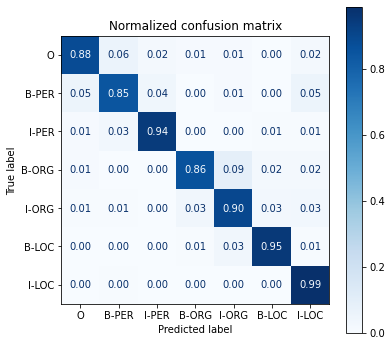

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_preds, y_true, lables):
    cm = confusion_matrix(y_true, y_preds, normalize='true')
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lables)
    disp.plot(cmap='Blues', values_format='.2f', ax=ax)
    plt.title('Normalized confusion matrix')
    plt.show()
    
plot_confusion_matrix(df_tokens['labels'], df_tokens['predicted_label'], tags.names)

In [69]:
def get_samples(df):
    for _, row in df.iterrows():
        labels, preds, tokens, losses = [], [], [], []
        for i, mask in enumerate(row['attention_mask']):
            if i not in {0, len(row['attention_mask'])}:
                labels.append(row['labels'][i])
                preds.append(row['predicted_label'][i])
                tokens.append(row['input_tokens'][i])
                losses.append(f"{row['loss'][i]:.2f}")
        df_tmp = pd.DataFrame({'tokens': tokens, 'labels': labels,
                              'preds': preds, 'losses': losses}).T
        yield df_tmp

df['total_loss'] = df['loss'].apply(sum)
df_tmp = df.sort_values(by='total_loss', ascending=False).head(3)

for sample in get_samples(df_tmp):
    display(sample)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
tokens,▁',▁'',▁Τ,Κ,▁'',▁',▁',▁'',▁T,▁'',▁',ri,▁'',▁',k,▁'',▁',ala,</s>
labels,O,O,O,IGN,O,O,B-LOC,I-LOC,I-LOC,I-LOC,I-LOC,IGN,I-LOC,I-LOC,IGN,I-LOC,I-LOC,IGN,IGN
preds,O,O,B-ORG,B-ORG,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
losses,0.00,0.00,5.60,0.00,0.00,0.00,10.60,10.80,8.37,7.52,8.33,0.00,8.15,9.31,0.00,8.42,8.91,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
tokens,▁'',8,.,▁Juli,▁'',▁:,▁Protest,camp,▁auf,▁dem,▁Gelände,▁der,▁Republika,n,ischen,▁Gar,de,</s>
labels,B-ORG,IGN,IGN,I-ORG,I-ORG,I-ORG,I-ORG,IGN,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,IGN,IGN,I-ORG,IGN,IGN
preds,O,O,O,O,O,O,O,O,O,O,O,O,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,O
losses,8.25,0.00,0.00,6.09,8.36,8.60,6.52,0.00,7.68,8.49,6.95,6.27,5.30,0.00,0.00,0.01,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
tokens,▁United,▁Nations,▁Multi,dimensional,▁Integra,ted,▁Stabil,ization,▁Mission,▁in,▁the,▁Central,▁African,▁Republic,</s>
labels,B-PER,I-PER,I-PER,IGN,I-PER,IGN,I-PER,IGN,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,IGN
preds,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,O
losses,6.38,5.93,6.15,0.00,6.06,0.00,6.12,0.00,5.79,6.03,6.01,6.25,5.93,5.96,0.00


In [71]:
df_tmp = df.loc[df['input_tokens'].apply(lambda x: u'\u2581(' in x)].head(2)
for sample in get_samples(df_tmp):
    display(sample)

,0,1,2,3,4,5
tokens,▁Ham,a,▁(,▁Unternehmen,▁),</s>
labels,B-ORG,IGN,I-ORG,I-ORG,I-ORG,IGN
preds,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,O
losses,0.01,0.00,0.02,0.01,0.02,0.00


,0,1,2,3,4,5,6,7
tokens,▁Kesk,kül,a,▁(,▁Mart,na,▁),</s>
labels,B-LOC,IGN,IGN,I-LOC,I-LOC,IGN,I-LOC,IGN
preds,B-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,O
losses,0.02,0.00,0.00,0.01,0.01,0.00,0.01,0.00


# p115 Cross-Lingual Transfer

In [72]:
def get_f1_score(trainer, dataset):
    return trainer.predict(dataset).metrics['test_f1']

In [74]:
f1_scores = defaultdict(dict)
f1_scores['de']['de'] = get_f1_score(trainer, panx_de_encoded['test'])
print(f"F1-score of [de] model on [de] dataset: {f1_scores['de']['de']:.3f}")

F1-score of [de] model on [de] dataset: 0.867


In [75]:
text_fr = 'Jeff Dean est informaticien chez Google en Californie'
tag_text(text_fr, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁est,▁informatic,ien,▁chez,▁Google,▁en,▁Cali,for,nie,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,B-ORG,O,B-LOC,B-LOC,I-LOC,O


In [76]:
def evaluate_lang_performance(lang, trainer):
    panx_ds = encode_panx_dataset(panx_ch[lang])
    return get_f1_score(trainer, panx_ds['test'])

f1_scores['de']['fr'] = evaluate_lang_performance('fr', trainer)
print(f"F1-score of [de] model on [fr] dataset: {f1_scores['de']['fr']:.3f}")

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

F1-score of [de] model on [fr] dataset: 0.703


In [77]:
f1_scores['de']['it'] = evaluate_lang_performance('it', trainer)
print(f"F1-score of [de] model on [it] dataset: {f1_scores['de']['it']:.3f}")

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

F1-score of [de] model on [it] dataset: 0.679


In [78]:
f1_scores['de']['en'] = evaluate_lang_performance('en', trainer)
print(f"F1-score of [de] model on [en] dataset: {f1_scores['de']['en']:.3f}")

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

F1-score of [de] model on [en] dataset: 0.588


# p116 Wehn Does Zero-Shot Transfer Make sense